In [1]:
df_train = pd.read_csv("../data/train_no_missing.csv")
import re
from utils.EDA.analysis import *

In [2]:
# report 확인
def LinearRegR(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    print(result.summary())
    return result
    

def plot_pre_tar(result, data, tar):
    predict = result.predict(data).values

    target = data[tar].values
    plt.scatter(target, predict)
    
    return result
    
# 예측치와 추정치 결과 확인 (위치도 출력)
# plot_leverage_resid2, influence_plot 확인
def LinearReg(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values
    plt.scatter(target, predict)
    
    return result
    
    
def LinearRegO(data, formula, num_param):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values

#     ax = plt.subplot()
#     plt.scatter(target, predict)
#     cook_d2, pvals = result.get_influence().cooks_distance
#     fox_cr = 4 / (len(y) - num_param)
#     idx = np.where(cook_d2 > fox_cr)[0]
#     plt.scatter(target[idx], predict[idx], s=300, c="r", alpha=0.5)
#     utils.annotate_axes(range(len(idx)), idx, 
#                     list(zip(target[idx], predict[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
    
    
    sm.graphics.influence_plot(result)
    
def LinearRegExo(data, formula, column):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    fig = sm.graphics.plot_regress_exog(result, column)
    fig.set_size_inches(10, 10)
# 그래프 보기( 잔차 ) / 컬럼 값이 입력
# plot_regress_exog(fitting plit, residal-x, partial, CCPR)

In [3]:
def makeFormula(target, numeric=None, categoric=None, noInter = False, scale = False):
    formula = ""
    formula += target
    formula += "~"
    
    if(numeric != None):
        if scale == True:
            numeric = list(map(lambda c :  "scale(" + c + ")", numeric))
        formula_numeric = "+".join(numeric)
        formula += formula_numeric 
    
    if(numeric != None and categoric != None):
        formula += "+"
    
    if(categoric != None):
        categoric = list(map(lambda c :  "C(" + c + ")", categoric))
        formula_categoric = "+".join(categoric)
        formula += formula_categoric
    
    if(noInter == True):
        formula +="+0"
    
    return formula

In [4]:
# 전처리
# numeric -> categorical
nuTocaList = ["MSSubClass", "MoSold", "YrSold", "OverallQual", "OverallCond"]
df_train[nuTocaList] = df_train[nuTocaList].astype("str")

## 실험 1. Numeric data에서 연관이 깊은 데이터 출력 

In [5]:
numeric_list = []
categoric_list = []

for c in df_train.columns:
    if df_train[c].dtype == "int64" or df_train[c].dtype == "float64":
        numeric_list.append(c)
    else:
        categoric_list.append(c)

# df_train = pd.get_dummies(df_train)
# li_column = [c for c in df_train.columns]
        
numeric_list.remove("log_SalePrice")
numeric_list.remove("Id")

numeric_list

['log_LotFrontage',
 'log_LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'log_1stFlrSF',
 'SecondFlrSF',
 'LowQualFinSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ThreeSsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [6]:
# Backward method
num_iter = 0
isLoop = True

while(isLoop):
    num_iter += 1
    
    model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, None, False), df_train)
    result = model.fit()
    
    pvalues = result.pvalues
    max_index = pvalues.sort_values(ascending = False).index[0]
    max_value = pvalues.sort_values(ascending = False).values[0]
    
    print("{} 단계 : max_t_value : ({}, {}) \n".format(num_iter, max_index, max_value))

    print("현재 list : ", end = "")
    for c in numeric_list:
        print("{}, ".format(c), end = "")
    print("\n")
    
    if max_value > 0.01:
        numeric_list.remove(max_index)
        isLoop = True
    else:
        isLoop = False

1 단계 : max_t_value : (OpenPorchSF, 0.93717740042381) 

현재 list : log_LotFrontage, log_LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, log_1stFlrSF, SecondFlrSF, LowQualFinSF, log_GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ThreeSsnPorch, ScreenPorch, PoolArea, MiscVal, 

2 단계 : max_t_value : (GarageArea, 0.8955200745777956) 

현재 list : log_LotFrontage, log_LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, log_1stFlrSF, SecondFlrSF, LowQualFinSF, log_GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, EnclosedPorch, ThreeSsnPorch, ScreenPorch, PoolArea, MiscVal, 

3 단계 : max_t_value : (log_LotFrontage, 0.8605764940745875) 

현재 list : log_LotFronta

# correlation 확인

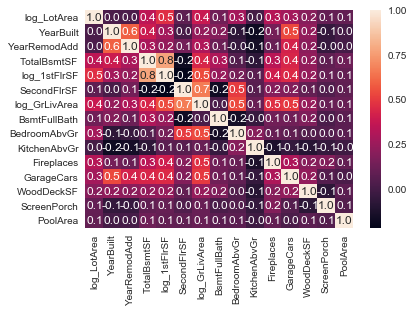

In [7]:
cor_numeric_list = df_train[numeric_list].corr()
sns.heatmap(cor_numeric_list, annot = True, fmt = ".1f")

In [8]:
get_top_abs_cor(df_train[numeric_list], 20)

TotalBsmtSF    log_1stFlrSF     0.779571
SecondFlrSF    log_GrLivArea    0.662904
YearBuilt      YearRemodAdd     0.592855
log_1stFlrSF   log_GrLivArea    0.545984
log_GrLivArea  BedroomAbvGr     0.538848
YearBuilt      GarageCars       0.537850
SecondFlrSF    BedroomAbvGr     0.502901
log_GrLivArea  GarageCars       0.496132
               Fireplaces       0.468915
log_LotArea    log_1stFlrSF     0.467465
log_1stFlrSF   GarageCars       0.448201
TotalBsmtSF    log_GrLivArea    0.435852
               GarageCars       0.434585
YearRemodAdd   GarageCars       0.420622
log_1stFlrSF   Fireplaces       0.403688
YearBuilt      TotalBsmtSF      0.391452
log_LotArea    log_GrLivArea    0.385435
               TotalBsmtSF      0.351838
TotalBsmtSF    Fireplaces       0.339519
log_LotArea    Fireplaces       0.327754
dtype: float64

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     496.0
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:45:13   Log-Likelihood:                 594.92
No. Observations:                1460   AIC:                            -1158.
Df Residuals:                    1444   BIC:                            -1073.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.0387      0.534     -7.556      0.000      -5.087      -2.990
log_LotArea       0.0670      0.010      6.703      0.000       0.047       0.087
YearBuilt         0.0027      0.000     13.300      0.000       0.002       0.003
YearRemodAdd      0.0032      0.000     11.990      0.000       0.003       0.004
TotalBsmtSF       0.0001   1.67e-05      6.345      0.000    7.31e-05       0.000
log_1stFlrSF      0.2146      0.046      4.639      0.000       0.124       0.305
SecondFlrSF       0.0002   3.53e-05      4.415      0.000    8.67e-05       0.000
log_GrLivArea     0.2978      0.054      5.469      0.000       0.191       0.405
BsmtFullBath      0.0517      0.009      5.812      0.000       0.034       0.069
BedroomAbvGr     -0.0192      0.007     -2.782      0.005      -0.033      -0.006
KitchenAbvGr     -0.1755      0.021     -8.410      0.000      -0.216      -0.135
Fireplaces        0.0492      0.008      6.091      0.000       0.033       0.065
GarageCars        0.0823      0.008     10.527      0.000       0.067       0.098
WoodDeckSF     9.826e-05   3.66e-05      2.684      0.007    2.64e-05       0.000
ScreenPorch       0.0003   7.85e-05      4.145      0.000       0.000       0.000
PoolArea         -0.0003      0.000     -2.793      0.005      -0.001   -8.99e-05
==============================================================================
Omnibus:                      750.854   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15440.388
Skew:                          -1.923   Prob(JB):                         0.00
Kurtosis:                      18.460   Cond. No.                     3.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 카테고리 영향력 확인 

In [10]:
# 카테고리와 Numeric 입력후에 test돌려 f-검정이 높은 것 제거
# 카테고리
num_iter = 0

while True:
    num_iter +=1
    model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, categoric_list, False), data=df_train)
    result = model.fit()
    #     print(result.summary())
    df_anova = sm.stats.anova_lm(result, typ =2)
    remove_li = list(df_anova[df_anova["PR(>F)"] > 0.01].index)
    
    print("{} 차 시도 !!\n".format(num_iter))
    print(df_anova[df_anova["PR(>F)"] > 0.01])
    print()
    
    if len(remove_li) > 0:
        
        # 제거
        for c in remove_li:
            if re.match(r'C\((\w+)\)', c):
                s = re.sub(r"C\((\w+)\)", r"\g<1>", c)
                categoric_list.remove(s)
            else:
                numeric_list.remove(c)
    else:
        break

1 차 시도 !!

                   sum_sq    df         F    PR(>F)
C(MSSubClass)    0.172798  14.0  1.216948  0.256103
C(Street)        0.024600   1.0  2.425468  0.119645
C(Alley)         0.019005   2.0  0.936897  0.392132
C(LotShape)      0.055134   3.0  1.811996  0.143142
C(LandContour)   0.027322   3.0  0.897957  0.441597
C(Utilities)     0.036413   1.0  3.590203  0.058364
C(BldgType)      0.006310   4.0  0.155536  0.960530
C(HouseStyle)    0.083710   7.0  1.179070  0.311722
C(RoofStyle)     0.063934   5.0  1.260741  0.278568
C(Exterior2nd)   0.107933  15.0  0.709452  0.776832
C(MasVnrType)    0.065681   3.0  2.158644  0.091212
C(ExterQual)     0.018881   3.0  0.620540  0.601764
C(ExterCond)     0.066686   4.0  1.643742  0.160906
C(Foundation)    0.099270   5.0  1.957533  0.082335
C(BsmtQual)      0.091978   4.0  2.267166  0.060064
C(BsmtCond)      0.082474   4.0  2.032901  0.087608
C(BsmtFinType2)  0.061970   6.0  1.018335  0.411577
C(HeatingQC)     0.104902   4.0  2.585735  0.035566
C

In [16]:
model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, categoric_list, False), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:46:48   Log-Likelihood:                 1258.0
No. Observations:                1460   AIC:                            -2266.
Df Residuals:                    1335   BIC:                            -1605.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## 카테고리 bin 다시 설정

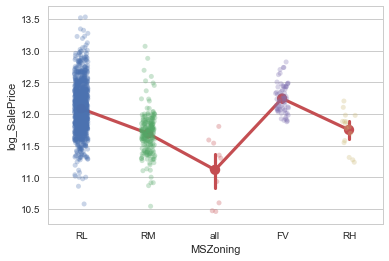

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     77.61
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.02e-59
Time:                        16:51:20   Log-Likelihood:                -590.19
No. Observations:                1460   AIC:                             1190.
Df Residuals:                    1455   BIC:                             1217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(MSZoning)[FV]     12.2466      0.045  

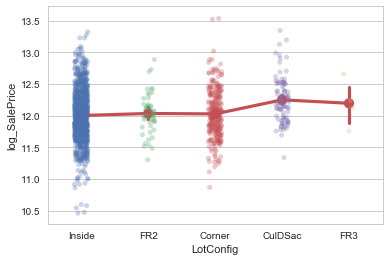

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     8.692
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           6.21e-07
Time:                        16:51:21   Log-Likelihood:                -714.12
No. Observations:                1460   AIC:                             1438.
Df Residuals:                    1455   BIC:                             1465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(LotConfig)[Corner]     12.02

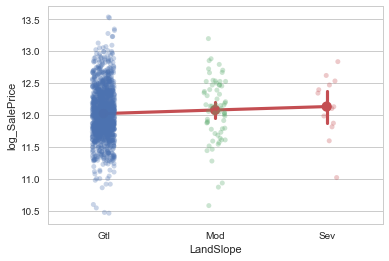

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.083
Date:                Wed, 07 Mar 2018   Prob (F-statistic):              0.339
Time:                        16:51:21   Log-Likelihood:                -730.28
No. Observations:                1460   AIC:                             1467.
Df Residuals:                    1457   BIC:                             1482.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(LandSlope)[Gtl]    12.0206      0.01

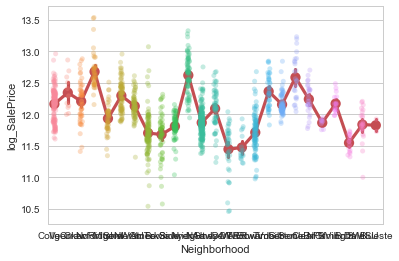

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     79.52
Date:                Wed, 07 Mar 2018   Prob (F-statistic):          4.04e-243
Time:                        16:51:23   Log-Likelihood:                -113.89
No. Observations:                1460   AIC:                             277.8
Df Residuals:                    1435   BIC:                             409.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(Neighborhood)[Blmngtn]

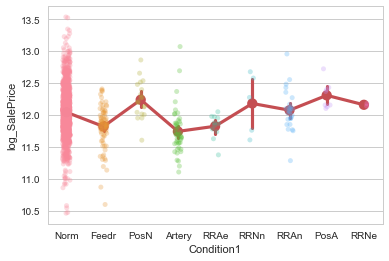

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     8.038
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.17e-10
Time:                        16:51:23   Log-Likelihood:                -699.71
No. Observations:                1460   AIC:                             1417.
Df Residuals:                    1451   BIC:                             1465.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(Condition1)[Artery]    11.74

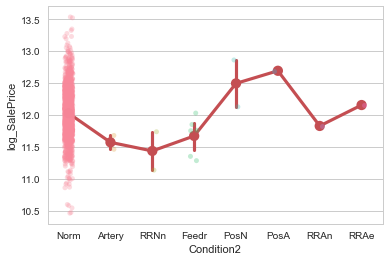

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.528
Date:                Wed, 07 Mar 2018   Prob (F-statistic):             0.0138
Time:                        16:51:24   Log-Likelihood:                -722.52
No. Observations:                1460   AIC:                             1461.
Df Residuals:                    1452   BIC:                             1503.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(Condition2)[Artery]    11.57

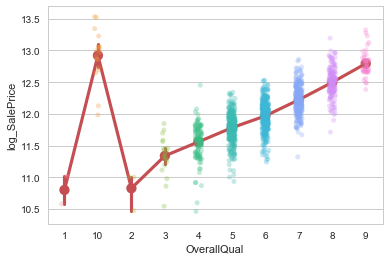

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     332.2
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:51:24   Log-Likelihood:                 85.490
No. Observations:                1460   AIC:                            -151.0
Df Residuals:                    1450   BIC:                            -98.12
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(OverallQual)[1]     10.7988      0

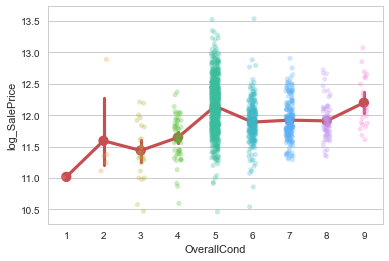

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     36.32
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           9.27e-53
Time:                        16:51:25   Log-Likelihood:                -598.11
No. Observations:                1460   AIC:                             1214.
Df Residuals:                    1451   BIC:                             1262.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(OverallCond)[1]    11.0186      0.36

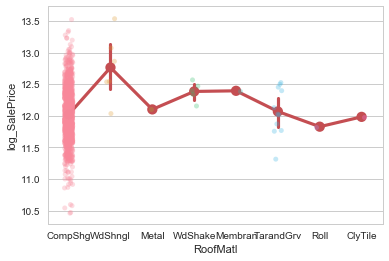

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.781
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           0.000450
Time:                        16:51:25   Log-Likelihood:                -718.18
No. Observations:                1460   AIC:                             1452.
Df Residuals:                    1452   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(RoofMatl)[ClyTile]      11

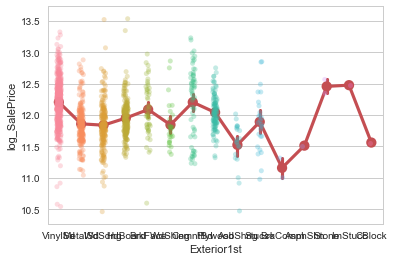

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     22.89
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.05e-53
Time:                        16:51:26   Log-Likelihood:                -585.13
No. Observations:                1460   AIC:                             1200.
Df Residuals:                    1445   BIC:                             1280.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(Exterior1st)[AsbShng]   

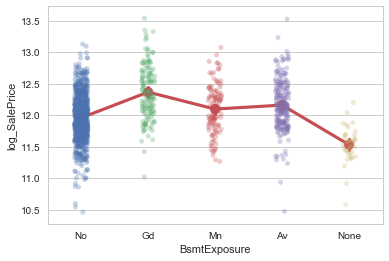

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     61.24
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           7.26e-48
Time:                        16:51:27   Log-Likelihood:                -617.77
No. Observations:                1460   AIC:                             1246.
Df Residuals:                    1455   BIC:                             1272.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(BsmtExposure)[Av]      12.15

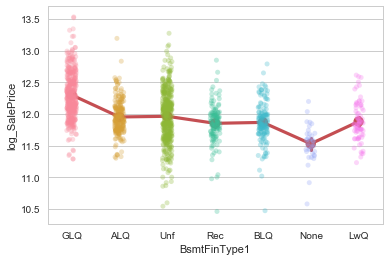

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     71.38
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           4.32e-78
Time:                        16:51:27   Log-Likelihood:                -542.78
No. Observations:                1460   AIC:                             1100.
Df Residuals:                    1453   BIC:                             1137.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(BsmtFinType1)[ALQ]     11.95

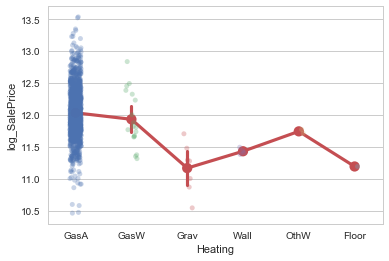

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     9.907
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           2.48e-09
Time:                        16:51:28   Log-Likelihood:                -706.91
No. Observations:                1460   AIC:                             1426.
Df Residuals:                    1454   BIC:                             1458.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Heating)[Floor]    11.1913      0.39

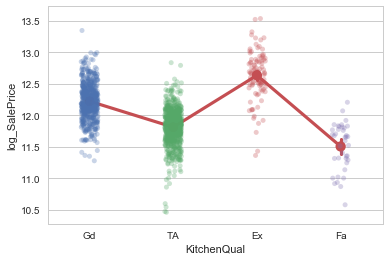

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     393.3
Date:                Wed, 07 Mar 2018   Prob (F-statistic):          4.44e-187
Time:                        16:51:28   Log-Likelihood:                -298.07
No. Observations:                1460   AIC:                             604.1
Df Residuals:                    1456   BIC:                             625.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(KitchenQual)[Ex]    12.6336      0

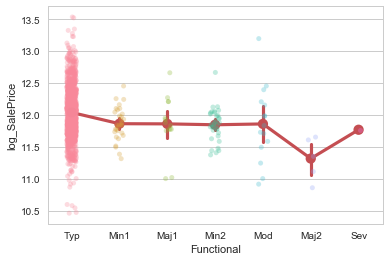

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.901
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           4.25e-06
Time:                        16:51:29   Log-Likelihood:                -713.79
No. Observations:                1460   AIC:                             1442.
Df Residuals:                    1453   BIC:                             1479.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Functional)[Maj1]    11.8596    

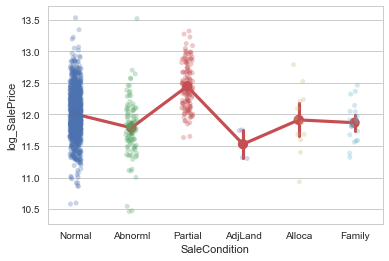

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     43.08
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.69e-41
Time:                        16:51:29   Log-Likelihood:                -630.52
No. Observations:                1460   AIC:                             1273.
Df Residuals:                    1454   BIC:                             1305.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
C(SaleCondition)[Abnor

In [19]:
for c in categoric_list:
    model = sm.OLS.from_formula(makeFormula("log_SalePrice", None, [c], True), data=df_train)
    result = model.fit()
    
    sns.stripplot(x=c, y="log_SalePrice", data=df_train, jitter=True, alpha=.3)
    sns.pointplot(x=c, y="log_SalePrice", data=df_train, dodge=True, color='r')
    plt.show()
    
    print(result.summary())

## Scale

In [12]:
model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, categoric_list, True, True), data=df_train)
result = model.fit()

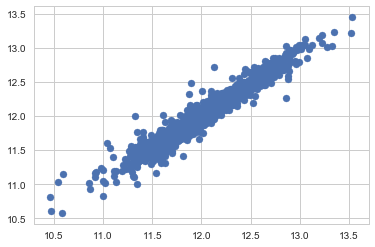

In [13]:
plot_pre_tar(result, df_train, "log_SalePrice")

In [15]:
##Test
df_test = pd.read_csv("../data/test_no_missing.csv")

# 전처리
# numeric -> categorical
df_test[nuTocaList] = df_test[nuTocaList].astype("str")
y = result.predict(df_test)
y = np.exp(y)

df_sumit = pd.DataFrame(columns = ["Id", "SalePrice"])
df_sumit["Id"] =df_test["Id"]
df_sumit["SalePrice"] = y

df_sumit.to_csv("../submit/submit.csv", index = False)

## Outlier 제거

In [ ]:
# 레버리지 확인
inf = result.get_influence()
hat = inf.hat_matrix_diag
plt.stem(hat)

In [ ]:
# 잔차 확인
plt.stem(result.resid_pearson)